<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단순 선형 회귀(Linear Regression) 시계열 예측

yfinance 설치 (Colab에서 실행 시 필요)

In [11]:
!pip install yfinance --upgrade --no-cache-dir

모듈 import

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)

In [13]:
df = yf.download("TSLA", start="2010-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


데이터 전처리: 날짜를 숫자로 변환

In [14]:
df = df.reset_index()
df["Day"] = np.arange(len(df))
X = df[["Day"]]
y = df["Close"]  # 종가(Close)를 예측 대상으로 설정

데이터 분할 (80% 학습, 20% 테스트)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



선형 회귀 모델 학습

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

예측 수행

In [17]:
y_pred = model.predict(X_test)

결과 시각화


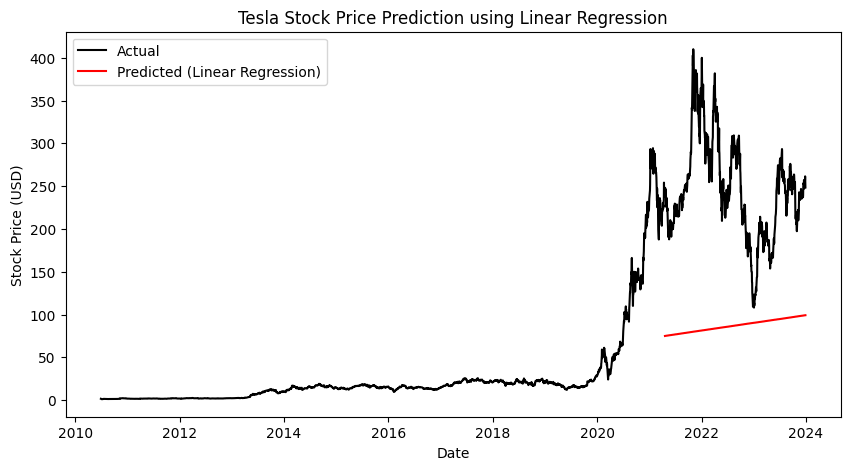

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], y, label="Actual", color="black")
plt.plot(df["Date"].iloc[len(X_train):], y_pred, label="Predicted (Linear Regression)", color="red")
plt.title("Tesla Stock Price Prediction using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()